# Module 4 - Algo Trading using Classification


   ### Welcome to the Answer notebook for Module 4 ! 
Make sure that you've submitted the module 3 notebook and unlocked Module 4 yourself before you start coding here


#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#

### Query 4.1 
Import the csv file of the stock which contained the Bollinger columns as well.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import  RandomForestClassifier
from sklearn.model_selection import train_test_split
import warnings 
warnings.filterwarnings('ignore')

### Query 4.1a 

Create a new column 'Call' , whose entries are - 

>'Buy' if the stock price is below the lower Bollinger band 

>'Hold Buy/ Liquidate Short' if the stock price is between the lower and middle Bollinger band 

>'Hold Short/ Liquidate Buy' if the stock price is between the middle and upper Bollinger band 

>'Short' if the stock price is above the upper Bollinger band




In [2]:
df=pd.read_csv('CSV/week3.csv')

In [3]:
df.isnull().sum()

Date                       0
Symbol                     0
Series                     0
Prev Close                 0
Open Price                 0
High Price                 0
Low Price                  0
Last Price                 0
Close Price                0
Average Price              0
Total Traded Quantity      0
Turnover                   0
No. of Trades              0
Deliverable Qty            0
% Dly Qt to Traded Qty     0
year                       0
month                      0
Day_Perc_Change            0
Trend                      0
ave                       13
upper                     13
lower                     13
dtype: int64

In [4]:
df.dropna(inplace=True)
df.reset_index(inplace=True)

In [5]:
df['Call']=0
for i in np.arange(df.ave.size):
    if df['Average Price'][i]>=df.upper[i]:
        print (i)
        df['Call'][i] = 'Short'
    elif df['Average Price'][i]<=df.lower[i]:
        print (i)
        df['Call'][i] = 'Buy'
    elif (df['Average Price'][i]>df.lower[i]) and (df['Average Price'][i]<=df.ave[i]):
        print (i)
        df['Call'][i] = 'Hold Buy/Liquidate Short'
    else :
        print (i)
        df['Call'][i] = 'Hold Short /Liquidate Buy'

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [6]:
df.Call.value_counts()

Hold Buy/Liquidate Short     245
Hold Short /Liquidate Buy    204
Buy                           17
Short                         15
Name: Call, dtype: int64

### Query 4.1b
Now train a classification model with the 3 bollinger columns and the stock price as inputs and 'Calls' as output. Check the accuracy on a test set. (There are many classifier models to choose from, try each one out and compare the accuracy for each)

In [7]:
RFX = df[['Average Price','upper','lower','ave']]
RFY = df['Call']

RFX_train , RFX_test , RFy_train , RFy_test = train_test_split(RFX,RFY,test_size=0.25,random_state=42)

In [8]:
classifier = RandomForestClassifier(n_estimators = 200 , n_jobs = -1 , criterion = 'entropy' , random_state = 23 ,max_depth = 10)
classifier.fit(RFX_train , RFy_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
            oob_score=False, random_state=23, verbose=0, warm_start=False)

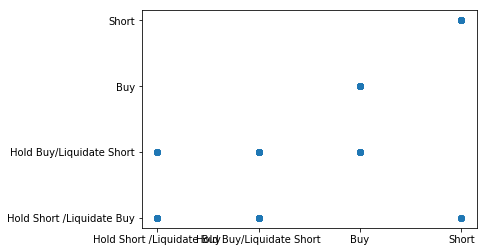

In [9]:
RFy_predict = classifier.predict(RFX)
plt.scatter(RFY,RFy_predict)
plt.show()

In [10]:
check = [RFY.values,RFy_predict]
check = pd.DataFrame(check)
check = check.T
check.columns = ['Call','Prediction']
check

,Call,Prediction
0,Hold Short /Liquidate Buy,Hold Short /Liquidate Buy
1,Hold Short /Liquidate Buy,Hold Short /Liquidate Buy
2,Hold Short /Liquidate Buy,Hold Short /Liquidate Buy
3,Hold Short /Liquidate Buy,Hold Short /Liquidate Buy
4,Hold Short /Liquidate Buy,Hold Short /Liquidate Buy
5,Hold Short /Liquidate Buy,Hold Short /Liquidate Buy
6,Hold Short /Liquidate Buy,Hold Short /Liquidate Buy
7,Hold Short /Liquidate Buy,Hold Short /Liquidate Buy
8,Hold Short /Liquidate Buy,Hold Short /Liquidate Buy
9,Hold Buy/Liquidate Short,Hold Buy/Liquidate Short


In [11]:
flag = 0 
for i in np.arange(len(df.ave)):
    if check.iloc[i,0]!=check.iloc[i,1]:
        flag=flag+1
print(flag)

accuracy = (RFy_test.size-flag)/RFy_test.size
accuracy*100

28


76.85950413223141

### Query 4.1c
Import another stock data and create the bollinger columns. Using the already defined model, predict the daily calls for this new stock.

In [38]:
df2= pd.read_csv('CSV/MARUTI.csv')

In [39]:
df2 = df2[df2.Series=='EQ']
df2.reset_index(inplace=True,drop=True)

In [40]:
def bands(price,length=14,numsd=2):
    ave = price.rolling(length).mean()
    sd = price.rolling(length).std()
    upband = ave + (sd*numsd)
    dnband = ave - (sd*numsd)
    return np.round(ave,3),np.round(upband,3),np.round(dnband,3)

df2['ave'],df2['upper'],df2['lower'] = bands(df2['Close Price'])

In [41]:
df2.isnull().sum()

Symbol                     0
Series                     0
Date                       0
Prev Close                 0
Open Price                 0
High Price                 0
Low Price                  0
Last Price                 0
Close Price                0
Average Price              0
Total Traded Quantity      0
Turnover                   0
No. of Trades              0
Deliverable Qty            0
% Dly Qt to Traded Qty     0
ave                       13
upper                     13
lower                     13
dtype: int64

In [42]:
df2.dropna(inplace=True)

In [43]:
df2.reset_index(inplace=True)

In [44]:
df2['Call']=0
for i in np.arange(df2.ave.size):
    if df2['Average Price'][i]>=df2.upper[i]:
        print (i)
        df2['Call'][i] = 'Short'
    elif df2['Average Price'][i]<=df2.lower[i]:
        print (i)
        df2['Call'][i] = 'Buy'
    elif (df['Average Price'][i]>df2.lower[i]) and (df2['Average Price'][i]<df2.ave[i]):
        print (i)
        df2['Call'][i] = 'Hold Buy/Liquidate Short'
    else :
        print (i)
        df2['Call'][i] = 'Hold Short /Liquidate Buy'

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [45]:
df2.Call.value_counts()

Hold Buy/Liquidate Short     232
Hold Short /Liquidate Buy    225
Short                         16
Buy                            8
Name: Call, dtype: int64

In [46]:
RFX2 = df2[['Average Price','upper','lower','ave']]
RFY2 = df2['Call']

RFX2_train , RFX2_test , RFy2_train , RFy2_test = train_test_split(RFX2,RFY2,test_size=0.25,random_state=42)

In [47]:
classifier2 = RandomForestClassifier(n_estimators = 200 , n_jobs = -1 , criterion = 'entropy' , random_state = 23 ,max_depth = 10)
classifier2.fit(RFX2_train , RFy2_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
            oob_score=False, random_state=23, verbose=0, warm_start=False)

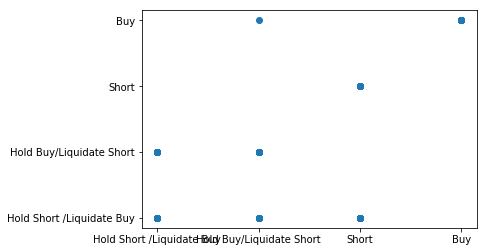

In [48]:
RFy2_predict = classifier2.predict(RFX2)
plt.scatter(RFY2,RFy2_predict)
plt.show()

In [49]:
check2 = [RFY2.values,RFy2_predict]
check2 = pd.DataFrame(check2)
check2 = check2.T
check2.columns = ['Call','Prediction']
check2

,Call,Prediction
0,Hold Short /Liquidate Buy,Hold Short /Liquidate Buy
1,Hold Short /Liquidate Buy,Hold Short /Liquidate Buy
2,Hold Short /Liquidate Buy,Hold Short /Liquidate Buy
3,Hold Short /Liquidate Buy,Hold Short /Liquidate Buy
4,Hold Short /Liquidate Buy,Hold Short /Liquidate Buy
5,Hold Short /Liquidate Buy,Hold Short /Liquidate Buy
6,Hold Short /Liquidate Buy,Hold Short /Liquidate Buy
7,Hold Short /Liquidate Buy,Hold Short /Liquidate Buy
8,Hold Short /Liquidate Buy,Hold Short /Liquidate Buy
9,Hold Short /Liquidate Buy,Hold Short /Liquidate Buy


In [50]:
flag = 0 
for i in np.arange(len(df.ave)):
    if check2.iloc[i,0]!=check2.iloc[i,1]:
        flag=flag+1
print(flag)

accuracy = (RFy_test.size-flag)/RFy_test.size
accuracy*100

24


80.16528925619835

### Query 4.2 
Now, we'll again utilize classification to make a trade call, and measure the efficiency of our trading algorithm over the past two years. For this assignment , we will use RandomForest classifier.
Import the stock data file of your choice
Define 4 new columns , whose values are: 
% change between Open and Close price for the day 
% change between Low and High price for the day 
5 day rolling mean of the day to day % change in Close Price 
5 day rolling std of the day to day % change in Close Price
Create a new column 'Action' whose values are: 
1 if next day's price(Close) is greater than present day's. 
(-1) if next day's price(Close) is less than present day's. 
i.e. Action [ i ] = 1 if Close[ i+1 ] > Close[ i ] 
i.e. Action [ i ] = (-1) if Close[ i+1 ] < Close[ i ]
Construct a classification model with the 4 new inputs and 'Action' as target
Check the accuracy of this model , also , plot the net cumulative returns (in %) if we were to follow this algorithmic model

In [52]:
data = pd.read_csv('CSV/Nifty50.csv')
data['Close Price'] = data['Close']
data['Open Price'] = data['Open']
data['High Price'] = data['High']
data['Low Price'] = data['Low']

data['Day_Perc_Change'] = 100*data['Close Price'].pct_change()
data.iloc[0,-1]=0

data['Open-Close'] = (data['Open Price'] - data['Close Price'])/data['Open Price']
data['High-Low'] = (data['High Price'] - data['Low Price'])/data['Low Price']
data['STD_5'] = data['Day_Perc_Change'].rolling(5).std()
data['ret_5'] = data['Day_Perc_Change'].rolling(5).mean()
data.dropna(inplace=True)

In [54]:
data['Action'] = np.where(data['Close Price'].shift(-1) > data['Close Price'] , 1,-1)

In [55]:
x = data[['Open-Close','High-Low','STD_5','ret_5']]

y= data['Action']

In [56]:
result = pd.concat([data['Close Price'], y],axis = 1,join='inner')
result

,Close Price,Action
4,9427.90,1
5,9438.25,-1
6,9386.15,-1
7,9360.55,1
8,9509.75,1
9,9595.10,1
10,9604.90,1
11,9624.55,-1
12,9621.25,-1
13,9616.10,1


In [58]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.25 , random_state=42)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(367, 4) (123, 4)
(367,) (123,)


In [59]:
clf = RandomForestClassifier(random_state=5)

In [60]:
model = clf.fit(X_train , y_train)

In [61]:
from sklearn.metrics import accuracy_score
print('Correct Prediction (%)',accuracy_score(y_test,model.predict(X_test),normalize=True)*100.0)

Correct Prediction (%) 51.21951219512195


In [62]:
data['strategy_returns'] = data.Day_Perc_Change * model.predict(x)

In [63]:
data

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),Close Price,Open Price,High Price,Low Price,Day_Perc_Change,Open-Close,High-Low,STD_5,ret_5,Action,strategy_returns
4,19-May-2017,9469.90,9505.75,9390.75,9427.90,259861396,11544.77,9427.90,9469.90,9505.75,9390.75,-0.016438,0.004435,0.012246,0.619882,-0.035542,1,0.016438
5,22-May-2017,9480.25,9498.65,9427.90,9438.25,202874757,9432.97,9438.25,9480.25,9498.65,9427.90,0.109781,0.004430,0.007504,0.623390,-0.013585,-1,-0.109781
6,23-May-2017,9445.05,9448.05,9370.00,9386.15,231345629,11553.27,9386.15,9445.05,9448.05,9370.00,-0.552009,0.006236,0.008330,0.501656,-0.265538,-1,0.552009
7,24-May-2017,9410.90,9431.90,9341.65,9360.55,218265181,11045.95,9360.55,9410.90,9431.90,9341.65,-0.272742,0.005350,0.009661,0.448964,-0.348471,1,-0.272742
8,25-May-2017,9384.05,9523.30,9379.20,9509.75,298147347,16964.26,9509.75,9384.05,9523.30,9379.20,1.593923,-0.013395,0.015364,0.834151,0.172503,1,1.593923
9,26-May-2017,9507.75,9604.90,9495.40,9595.10,225647631,11204.36,9595.10,9507.75,9604.90,9495.40,0.897500,-0.009187,0.011532,0.881206,0.355291,1,0.897500
10,29-May-2017,9560.05,9637.75,9547.70,9604.90,242266034,12484.61,9604.90,9560.05,9637.75,9547.70,0.102135,-0.004691,0.009432,0.881745,0.353761,1,0.102135
11,30-May-2017,9590.65,9635.30,9581.20,9624.55,199894193,9765.40,9624.55,9590.65,9635.30,9581.20,0.204583,-0.003535,0.005646,0.741155,0.505080,-1,-0.204583
12,31-May-2017,9636.55,9649.60,9609.25,9621.25,427053433,19605.94,9621.25,9636.55,9649.60,9609.25,-0.034287,0.001588,0.004199,0.684065,0.552771,-1,0.034287
13,01-Jun-2017,9603.55,9634.65,9589.90,9616.10,181533283,9482.61,9616.10,9603.55,9634.65,9589.90,-0.053527,-0.001307,0.004666,0.391331,0.223281,1,-0.053527


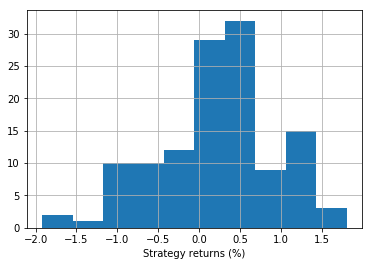

In [64]:
data.strategy_returns[y_train.size:].hist()
plt.xlabel('Strategy returns (%)')
plt.show()

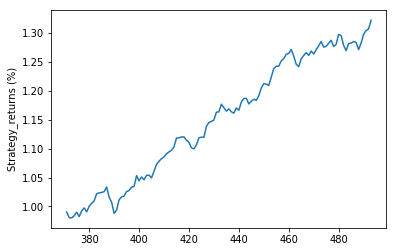

In [65]:
((data.strategy_returns[y_train.size:]+100)/100).cumprod().plot()
plt.ylabel('Strategy_returns (%)')
plt.show()